<a href="https://colab.research.google.com/github/anandkc812/data-analytics/blob/master/StockPredictionLSTM_CNN_MA10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

## Replicating from following web
##https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd








In [0]:
from google.colab import drive
import pandas as pd


drive.mount('/content/gdrive')


apple_file = '/content/gdrive/My Drive/data/AAPL.csv'


apple_training_complete = pd.read_csv(apple_file)




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


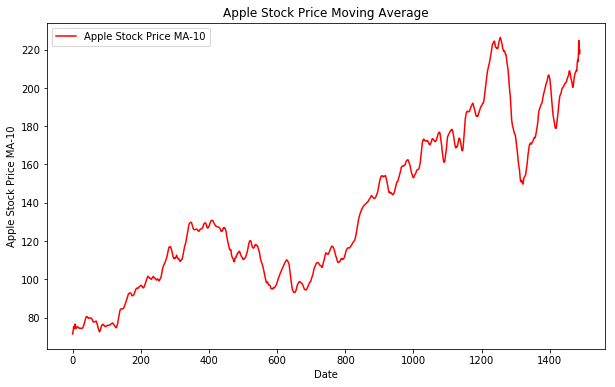

In [0]:
import copy

def mov_avg(x, w):
  
    ma_x = copy.deepcopy(x) #np.ones(len(x))
    
    m =40
    len(x[m-w:m])
    for m in range(w, len(x)-(w-1)):
      
         ma_x[m] = sum(x[m-w:m]) / w 
    
    return ma_x
 
  
apple_training_processed_orig = apple_training_complete.iloc[:, 1:2].values




apple_training_processed = mov_avg(apple_training_processed_orig,10)




plt.figure(figsize=(10,6))
#plt.plot(apple_training_processed_orig, color='blue', label='Actual Apple Stock Price')
plt.plot(apple_training_processed , color='red', label='Apple Stock Price MA-10')
plt.title('Apple Stock Price Moving Average')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price MA-10')
plt.legend()
plt.show()



from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler2 = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)
apple_training_scaled_orig = scaler.fit_transform(apple_training_processed_orig)



In [0]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled_orig[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])
    

features_set, labels = np.array(features_set), np.array(labels)    
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))



In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1],1)))

model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')




In [0]:
#X_Train = features_set.reshape(1200,1, 60)

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0297
Epoch 2/100
1200/1200 [==============================] - 7s 5ms/step - loss: 0.0036
Epoch 3/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0028
Epoch 4/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 5/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 6/100
1200/1200 [==============================] - 7s 5ms/step - loss: 0.0022
Epoch 7/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 8/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 9/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 10/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 11/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 12/100
1200/1200 [==============================] - 6s 5ms/step - l

In [0]:

apple_testing_processed = apple_training_processed[1260:]

test_size = len(apple_testing_processed) 


test_features = []
for i in range(1260, 1260+test_size):
    test_features.append(apple_testing_processed[i-60:i, 0])
    

    
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)


predictions = scaler.inverse_transform(predictions)
 




ValueError: ignored

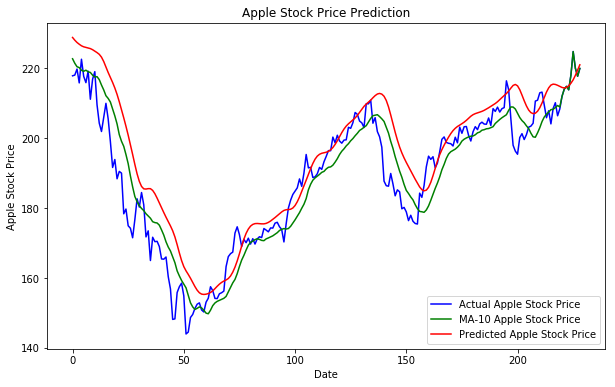

In [0]:
plt.figure(figsize=(10,6))
plt.plot(apple_training_processed_orig[1260:], color='blue', label='Actual Apple Stock Price')
plt.plot(apple_testing_processed, color='green', label='MA-10 Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

Mean Square Error in prediction of MA-10 :  5.841993917257436
Mean Square Error in ovarall prediction :  7.422582362027496


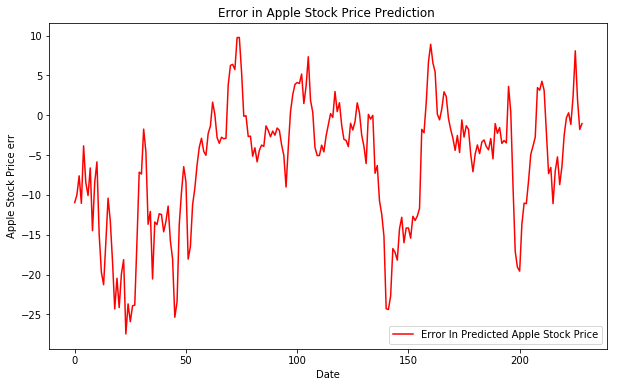

In [0]:

apple_testing_processed_orig  = apple_training_processed_orig[1260:]


diff_err = apple_testing_processed_orig - predictions


diff_mean_err = apple_testing_processed - predictions

mse = np.sqrt(diff_err*diff_err)

mse2 = np.mean(np.sqrt(diff_mean_err*diff_mean_err))



print("Mean Square Error in prediction of MA-10 : ", np.mean(mse2))

print("Mean Square Error in ovarall prediction : ", np.mean(mse))

plt.figure(figsize=(10,6))
#plt.plot(cov, color='blue', label='Actual Apple Stock Price Covariance')
plt.plot(diff_err , color='red', label='Error In Predicted Apple Stock Price')
plt.title('Error in Apple Stock Price Prediction ')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price err')
plt.legend()
plt.show()


